<a href="https://colab.research.google.com/github/erivandosena/Notebook_DataScience/blob/main/Notebook_BIX_Teste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Base de Dados | Questionário - Cientista de Dados

##### Dados de venda
- **ID:** identificador único de uma venda
- **ProductID:** identificador único de um produto
- **ClientID:** identificador único de um cliente
- **Discount:** desconto aplicado em uma venda
- **UnitPrice:** preço unitário de um produto vendido
- **Quantity:** quantidade de produto vendido em uma venda
- **StoreID:** identificador único de uma loja
- **Date:** data de uma venda

##### Dados de consumidores
- **ID:** identificador único de um consumidor
- **City:** cidade/localidade onde um consumidor fez a compra
- **State:** Unidade Federativa onde um consumidor fez a compra
- **DateOfBirth:** data de nascimento de um consumidor
- **Sex:** sexo de um consumidor

##### Dados de lojas
- **ID:** identificador único de uma loja
- **Name:** cidade/localidade de uma loja
- **State:** Unidade Federativa de uma loja

##### Dados de produto
- **ID:** identificador único de um produto
- **Name:** nome de um produto
- **Size:** tamanho de um produto

## Instalação de bibliotecas

In [ ]:
#collapse-hide
#Author: Erivando Sena
#Version: 1.0
#Date Mar 21, 2022

%pip install --upgrade pip
%pip install statsmodels==0.13.2
%pip install pmdarima
%pip install pystan 
%pip install fbprophet 

## Carregamento das bibliotecas necesárias

In [641]:
import warnings
import pandas as pd
import numpy as np
import fbprophet
import matplotlib.pyplot as plt
import pmdarima as pm
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import r2_score
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import seaborn as sns
import statsmodels.api as sm
import sklearn

print('Pandas:', pd.__version__)
print('Statsmodels:', sm.__version__)
print('Numpy:', np.__version__)

Pandas: 1.1.3
Statsmodels: 0.13.2
Numpy: 1.22.3


## Importação dos Dados

In [642]:
# elimina os warnings das bibliotecas
warnings.filterwarnings("ignore")

xlsx_link_file = 'https://docs.google.com/spreadsheets/d/1Sc6hN48b-lWbDdYNd_t9j8Bt0EZ8BUNG/export'

df_sheet_1 = pd.read_excel(xlsx_link_file, 'Sheet1', skiprows=4, usecols=lambda x: 'Unnamed' not in x)
df_sheet_2 = pd.read_excel(xlsx_link_file, 'Sheet2', skiprows=0, usecols=lambda x: 'Unnamed' not in x)
df_sheet_3 = pd.read_excel(xlsx_link_file, 'Sheet3', skiprows=0, usecols=lambda x: 'Unnamed' not in x)
df_sheet_4 = pd.read_excel(xlsx_link_file, 'Sheet4', skiprows=0, usecols=lambda x: 'Unnamed' not in x)

print("Dados de venda\n", df_sheet_1, "\n\nDados Missing\n", df_sheet_1.isna().sum(), "\n\nTipos de dados\n", df_sheet_1.dtypes)
print("\nDados de produto\n", df_sheet_2, "\n\nDados Missing\n", df_sheet_2.isna().sum(), "\n\nTipos de dados\n", df_sheet_2.dtypes)
print("\nDados de consumidores\n", df_sheet_3, "\n\nDados Missing\n", df_sheet_3.isna().sum(), "\n\nTipos de dados\n", df_sheet_3.dtypes)
print("\nDados de lojas\n", df_sheet_4, "\n\nDados Missing\n", df_sheet_4.isna().sum(), "\n\nTipos de dados\n", df_sheet_4.dtypes)

Dados de venda
                                      ID                          ProductID  \
0      80260d682079b6090c8285b398c50d97  002552c0663708129c0019cc97552d7d3   
1      3275736da1234f55d52bdf09d86b93bc  001b237c0e9bb435f2e54071129237e93   
2      f3513eec8f1434b5b7e04ddf3598df40  00066f42aeeb9f3007548bb9d3f33c381   
3      7180475b60fe6bbbde424d39704a1177  001b72dfd63e9833e8c02742adf472e33   
4      76600853a200fe87e141adae6b35674c  00210e41887c2a8ef9f791ebc780cc363   
...                                 ...                                ...   
32748  b155e2a8589d40bc9c0381ee48e3204f  002ec297b1b00fb9dde7ee6ac24b67712   
32749  abb71d0110c4be1a1a0c52f929cab4a3  002d4ea7c04739c130bb74d7e7cd16943   
32750  db9a034f34174edd577b9f64cc982952  001795ec6f1b187d37335e1c4704762e3   
32751  ee00fa5093eb96d8573403b382fb60a8  002ec297b1b00fb9dde7ee6ac24b67713   
32752  56c87d433bb46c7862e35e791b1907fa  0009406fd7479715e4bef61dd91f24622   

       ClientID  Discount  UnitPrice  Quantity 

### CONHECIMENTOS TÉCNICOS - CIENTISTA DE DADOS

O que está sendo avaliado:
- Conceitos de Data Science (DS) e Machine Learning (ML);
- Manipulação de dados;
- Estatística básica;
- Criação e avaliação de gráficos;
- Entendimento de negócio.

**1. Qual das respostas abaixo descreve a melhor maneira de organizar as etapas em um projeto com estes dados?**  

In [138]:
display("Validar dados com área de negócio, Análise Exploratória de Dados (EDA), Separação do conjunto de dados, pré processamento e transformações, \
Modelo inicial (baseline), validação preliminar área de negócio, Tunagem do modelo, construção do pipeline, subir modelo para produção.")

'Validar dados com área de negócio, Análise Exploratória de Dados (EDA), Separação do conjunto de dados, pré processamento e transformações, Modelo inicial (baseline), validação preliminar área de negócio, Tunagem do modelo, construção do pipeline, subir modelo para produção.'

**2. Com base nos dados da planilha anexada, qual tipo de modelo você escolheria para prever o valor total que será vendido por uma loja no próximo mês?**  


In [139]:
display('Modelos de forecasting.')

'Modelos de forecasting.'

**3. Se dois dos produtos na base de dados tem forte correlação positiva entre seus comportamento de vendas, qual gráfico abaixo melhor representaria essa relação?**  


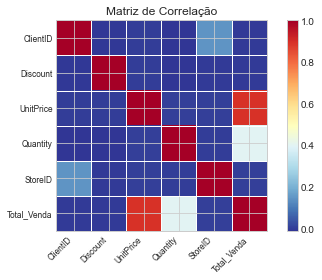

In [650]:
df_merge_prod = df_sheet_1.merge(df_sheet_2, left_on='ProductID', right_on='ID')
df_merge_prod = df_merge_prod.drop(['ID_x', 'ID_y'], axis=1)

df_corr = df_merge_prod.copy()

df_corr["Total_Venda"] = (df_corr.UnitPrice - df_corr.Discount) * df_corr.Quantity

#df_corr = df_corr.groupby(["ProductID","StoreID","Name","Size"])["Total_Venda"].agg('sum').sort_values(ascending=False).to_frame()
#df_corr = df_corr.groupby(["Name"])["Total_Venda"].sum().sort_values(ascending=False).to_frame().reset_index() 

correlacao = df_corr.corr()

#plotar correlação
sm.graphics.plot_corr(correlacao, xnames=correlacao.columns)
plt.title("Matriz de Correlação")
plt.show()

,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date,Name,Size,Total_Venda
0,002552c0663708129c0019cc97552d7d3,14001,0.08,249.2,1,4,2018-12-10,Tempestade,G,249.12
1,002552c0663708129c0019cc97552d7d3,14002,0.10,249.2,1,1,2019-03-28,Tempestade,G,249.10
2,002552c0663708129c0019cc97552d7d3,14004,0.08,249.2,1,2,2019-08-01,Tempestade,G,249.12
3,002552c0663708129c0019cc97552d7d3,14008,0.08,249.2,1,7,2019-06-04,Tempestade,G,249.12
4,002552c0663708129c0019cc97552d7d3,14020,0.08,249.2,1,2,2019-08-01,Tempestade,G,249.12
...,...,...,...,...,...,...,...,...,...,...
32748,001795ec6f1b187d37335e1c4704762e1,28434,0.10,148.4,1,4,2018-10-30,Mulher-Maravilha,P,148.30
32749,001795ec6f1b187d37335e1c4704762e1,28468,0.08,148.4,1,7,2019-08-10,Mulher-Maravilha,P,148.32
32750,001795ec6f1b187d37335e1c4704762e1,28470,0.08,148.4,1,4,2018-08-09,Mulher-Maravilha,P,148.32
32751,001795ec6f1b187d37335e1c4704762e1,28555,0.08,148.4,1,7,2019-08-17,Mulher-Maravilha,P,148.32


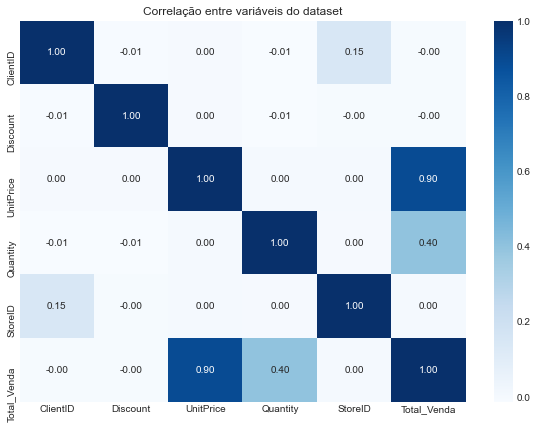

In [647]:
display(df_corr)
df_corr.dtypes

correlacao = df_corr.corr()
#plotar correlação
plt.figure(figsize=(10, 7))
sns.heatmap(df_corr.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset')
plt.show()

**4. Com base nos dados da planilha anexada, você deseja criar um algoritmo para prever a probabilidade de um cliente comprar um produto. Como você faria a divisão dos dados nas etapas de treinamento?**  *Nota: Por validação entende-se o conjunto usado para ajustar hiper-parâmetros, e por teste entende-se o conjunto de dados não visto em treino nem em validação.*


In [651]:
display('60% treino, 20% validação e 20 % teste')

'60% treino, 20% validação e 20 % teste'

**5. Quantos produtos únicos foram vendidos?**  


In [13]:
df_result = df_sheet_1.groupby(["ProductID"])["Quantity"].count().reset_index() 
df_result.count()

Quantity    73
dtype: int64

**6. Qual o produto mais vendido e quantos desse produto foram vendidos?**  


In [14]:
df_return = df_merge_prod.groupby(["ProductID","Name","Size"])["Quantity"].sum().sort_values(ascending=False).to_frame()
df_return.loc[df_return['Quantity'].idxmax()]

Quantity    1020
Name: (002ec297b1b00fb9dde7ee6ac24b67713, Bazinga, G), dtype: int64

**7. Considerando o ano de 2019, qual gráfico abaixo mais se parece à quantidade mensal do vendida do produto "Iron Man, G" ?**  


Month
1     29
2     20
3     27
4     30
5     34
6     51
7     37
8     57
9     25
10    29
11    25
12    55
dtype: int64


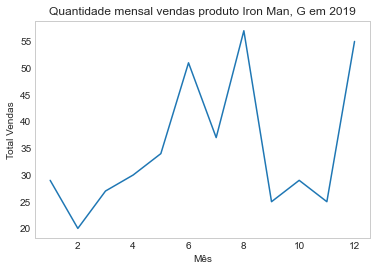

In [230]:
df_merge_plot["Year"] = pd.DatetimeIndex(df_merge_plot["Date"]).year
df_merge_plot["Month"] = pd.DatetimeIndex(df_merge_plot["Date"]).month  

df_merge_plot = df_merge_plot[df_merge_plot.Year.eq(2019)]
df_merge_plot = df_merge_plot[df_merge_plot.Name.eq("Iron Man")]
df_merge_plot = df_merge_plot[df_merge_plot.Size.eq("G")]

sales_month_2019 = df_merge_plot.groupby('Month').size()
print(sales_month_2019)

plt.style.use('seaborn-whitegrid')
plot_month = sales_month_2019.plot(title="Quantidade mensal vendas produto Iron Man, G em 2019")
plot_month.set_xlabel('Mês')
plot_month.set_ylabel('Total Vendas')
plot_month.grid()

**8. Considerando a receita líquida mensal de vendas em 2019. Quais os valores de: média, mediana e desvio padrão desses valores?**

In [18]:
df_merge_receita = df_merge_prod.drop(["ClientID", "ProductID", "Size", "Name"], axis=1)

df_merge_receita["Year"] = pd.DatetimeIndex(df_merge_receita["Date"]).year
df_merge_receita["Month"] = pd.DatetimeIndex(df_merge_receita["Date"]).month  
df_merge_receita = df_merge_receita[df_merge_receita.Year.eq(2019)]
df_merge_receita["receita"] = df_merge_receita.UnitPrice * df_merge_receita.Quantity
df_merge_receita_medidas = df_merge_receita.groupby(["Month"])[["receita"]].agg('sum').reset_index() 

#df_merge_receita.describe()
print("R${:,.2f}".format(df_merge_receita_medidas["receita"].mean()), "R${:,.2f}".format(df_merge_receita_medidas["receita"].median()), "R${:,.2f}".format(df_merge_receita_medidas["receita"].std()))

R$324,240.93 R$285,989.90 R$105,678.21


**9. Ainda considerando os dados de receita líquida de vendas em 2019, seu time deve focar esforços em uma das lojas para criar análises mais profundas e a primeira versão do modelo preditivo. Qual destas lojas você escolheria para prosseguir com o projeto? (1 ponto)**  


In [19]:
df_merge_loja = df_merge_receita.merge(df_sheet_4, left_on="StoreID", right_on="ID")
df_merge_loja.sort_values(by="Name", ascending=False).value_counts().head(1)

Discount  UnitPrice  Quantity  StoreID  Date        Year  Month  receita  ID  Name           State
0.08      233.8      1         1        2019-08-07  2019  8      233.8    1   Florianópolis  SC       6
dtype: int64

**10. Suponha que após realizar todas as etapas necessárias, seu time chegou em alguns modelos de forecasting para o volume mensal de vendas. Foram conduzidos alguns experimentos e os resultados de diferentes valores de erro percentual médio (MAPE) são apresentados abaixo. Dos resultados abaixo, qual o mais razoável que você escolheria para colocar o modelo em produção no ambiente do cliente?**   


Text(0.5, 1.0, 'Número médio mensal de receitas das vendas, 2018-2020')

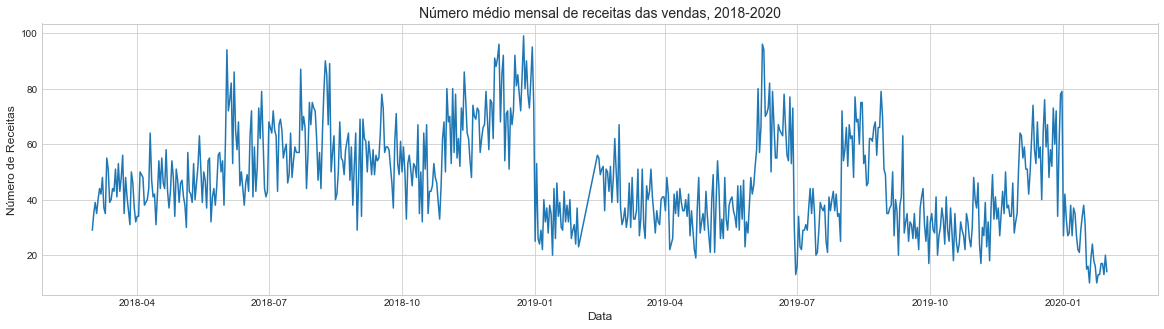

In [627]:
df_merge_forecasting = df_merge_prod.drop(["ClientID", "ProductID", "Size", "Name"], axis=1)

df_merge_forecasting["receita"] = df_merge_forecasting.UnitPrice * df_merge_forecasting.Quantity
#df_merge_forecasting["Month"] = df_merge_forecasting['Date'].dt.to_period('M')
#df_merge_forecasting = df_merge_forecasting.loc['2018-03-01':'2020-31-01']

df_merge_forecasting_plot = df_merge_forecasting.groupby(["Date"])[["receita"]].agg('count').reset_index() 

df=df_merge_forecasting_plot.rename(columns={'receita':'Receitas', 'Date':'Data'})
df['Data'] = pd.to_datetime(df['Data'])
df.set_index(df['Data'], inplace=True)
df=df.drop(columns=['Data'])
df.isnull().sum()

# Defina o tamanho da figura
plt.figure(figsize=(20,5))

# Criar gráfico de linha
plt.style.use('seaborn-whitegrid')
plt.plot(df['Receitas'])

# Defina rótulos e título
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Número de Receitas', fontsize=12)
plt.title('Número médio mensal de receitas das vendas, 2018-2020', fontsize=14)
# plt.savefig('NumeroMedioReceitas');

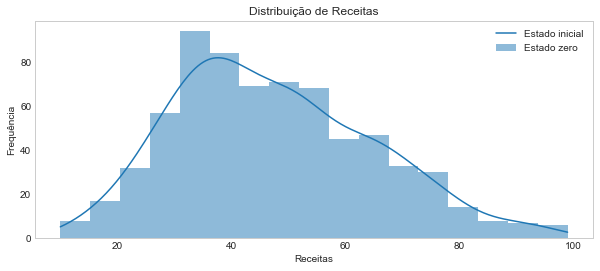

In [628]:
# Defina o tamanho da figura
fig, ax = plt.subplots(figsize=(10, 4))

plt.style.use('seaborn-whitegrid')
sns.histplot(df["Receitas"], kde=True, linewidth=0)
plt.legend(["Estado inicial", "Estado zero"])
plt.title('Distribuição de Receitas')
plt.ylabel('Frequência')
plt.grid()
plt.show()
# plt.savefig('DistribuicaoReceitas.jpg')

<Figure size 432x288 with 0 Axes>

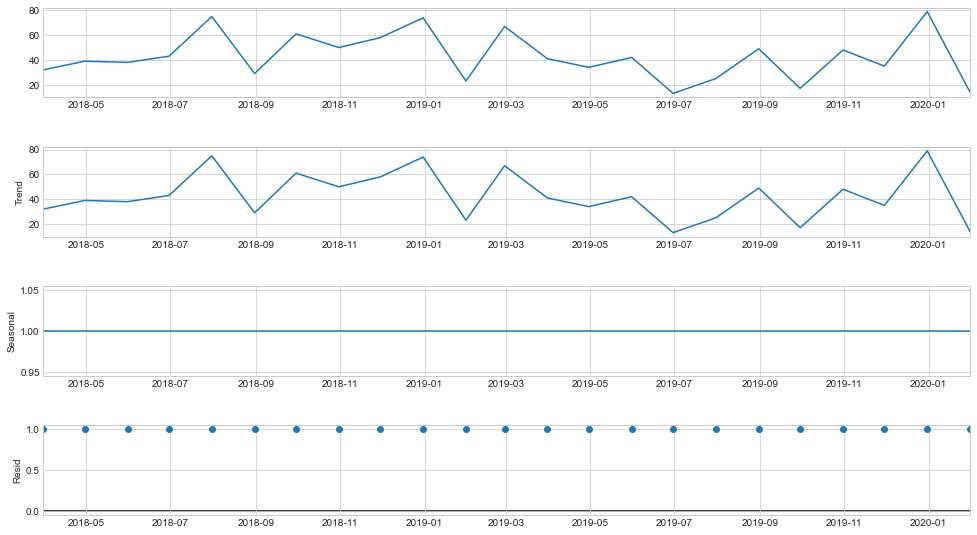

In [629]:
df_merge_forecasting = df_merge_prod.drop(["ClientID", "ProductID", "Size", "Name"], axis=1)

df_merge_forecasting["receita"] = df_merge_forecasting.UnitPrice * df_merge_forecasting.Quantity
df_merge_forecasting_plot = df_merge_forecasting.groupby(["Date"])[["receita"]].agg('count').reset_index() 

df = df_merge_forecasting_plot.rename(columns={'receita':'Receitas', 'Date':'Data'})

df['Data'] = pd.to_datetime(df['Data'])
df = df.set_index('Data').asfreq('M')
seasonal = seasonal_decompose(df, period=1, model='multiplicative')
fig = plt.figure()  
fig = seasonal.plot()  
fig.set_size_inches(15, 8)
# fig.savefig("ETS.jpg")

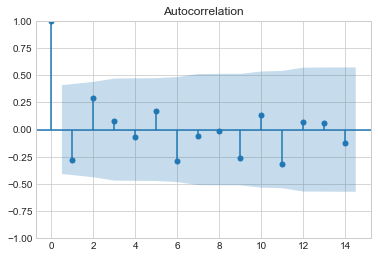

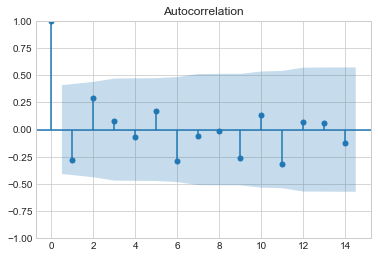

In [630]:
plot_acf(df['Receitas'])
# plt.savefig('1_ACF.jpg');

In [ ]:
#plot_pacf(df['Receitas'])
# plt.savefig('1_PACF.jpg');

# Só pode calcular correlações parciais para atrasos de até 50% do tamanho da amostra. Os nlags 14 solicitados devem ser < 11.

In [631]:
# Teste Dickey-Fuller
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

interpret_dftest(adfuller(df['Receitas']))

Test Statistic    0.151678
p-value           0.969417
dtype: float64

Desde α < p-valor = 0,99, não podemos rejeitar a hipótese nula. Então, vou tirar a diferença e fazer o teste novamente.

In [632]:
interpret_dftest(adfuller(df['Receitas'].diff().dropna()))

Test Statistic   -0.586122
p-value           0.874087
dtype: float64

In [633]:
interpret_dftest(adfuller(df['Receitas'].diff().diff().dropna()))

Test Statistic   -2.396696
p-value           0.142671
dtype: float64

<AxesSubplot:xlabel='Data'>

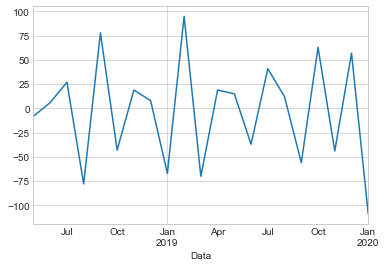

In [634]:
difference_df=df['Receitas'].diff().diff().dropna()
difference_df.plot()
# plt.savefig('Diferenca.jpg')

In [638]:
#PACF de resíduos do modelo Seasonal Snaive
#plot_acf(py_snaive_resid);
#plot_pacf(py_snaive_resid);

# Só pode calcular correlações parciais para atrasos de até 50% do tamanho da amostra. Os nlags 12 solicitados devem ser < 6.

In [643]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
import pandas.util.testing as tm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from pandas import DataFrame
from numpy import sqrt
from sklearn.metrics import mean_squared_error

In [601]:
df_series = df_merge_prod.copy()


df_series["Receita"] = (df_series.UnitPrice - df_series.Discount) * df_series.Quantity
#df_series['Date'] = df_series['Date'].dt.to_period('M')
series = df_series.groupby(["Date"])[["Receita"]].agg('sum').reset_index() # #.to_frame()

series['Date'] = pd.to_datetime(series['Date'])
series = series.set_index('Date').asfreq('M')

#series.index.freq='M'

series



,Receita
Date,
2018-03-31,7016.00
2018-04-30,7946.40
2018-05-31,8083.80
2018-06-30,10445.26
2018-07-31,15070.00
2018-08-31,6430.52
2018-09-30,12969.60
2018-10-31,11022.30
2018-11-30,12356.00


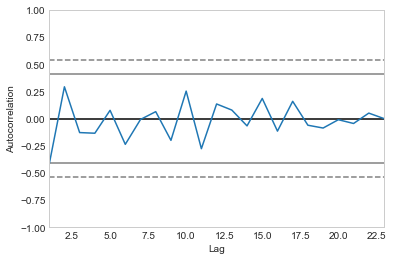

In [602]:
# autocorrelation plot 
autocorrelation_plot(series)
pyplot.show()

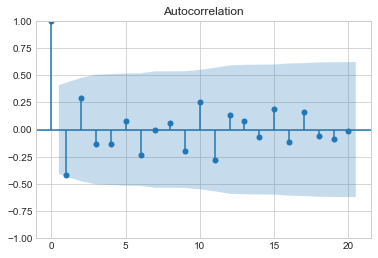

In [603]:
plot_acf(series, lags=20)
pyplot.show()

In [604]:
# ARIMA(p,d,q)
model = sm.tsa.arima.ARIMA(series, order=(2,0,1))
model_fit = model.fit()
display(model_fit.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Receita   No. Observations:                   23
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -223.277
Date:                Tue, 22 Mar 2022   AIC                            456.554
Time:                        15:05:42   BIC                            462.231
Sample:                    03-31-2018   HQIC                           457.982
                         - 01-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.027e+04    938.760     10.945      0.000    8434.765    1.21e+04
ar.L1         -0.2820      1.279     -0.220      0.825      -2.789       2.225
ar.L2          0.3328      0.750      0.444      0.657      -1.137       1.802
ma.L1         -0.0851      1.386     -0.061      0.951      -2.802       2.632
sigma2      1.711e+07      0.013   1.29e+09      0.000    1.71e+07    1.71e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.53
Prob(Q):                              0.88   Prob(JB):                         0.77
Heteroskedasticity (H):               2.96   Skew:                             0.35
Prob(H) (two-sided):                  0.15   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.62e+25. Standard errors may be unstable.
"""

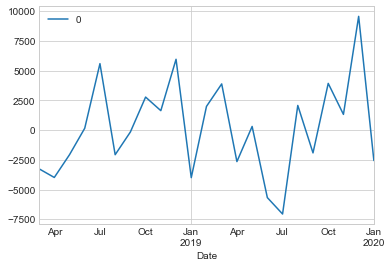

In [605]:
# plot residuais
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

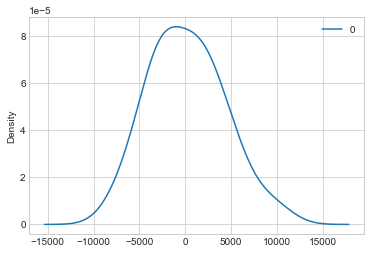

In [606]:
# gráficos de densidade dos residuais
residuals.plot(kind='kde')
pyplot.show()

In [607]:
# estatística descritiva dos residuos
display(residuals.describe())

,0
count,23.000000
mean,161.106724
std,4039.203760
min,-7060.354262
25%,-2608.660210
50%,151.073577
75%,2421.482358
max,9562.146138


**Prevendo dados com ARIMA utilizando Walk Forward**  
Separando os dados de treino e teste

In [608]:
# a variável X recebe os dados da série
X = series.values
X = X.astype('float64')

# Separa os dados com 50% dos dados para treino e 50% dos dados para teste
size = int(len(X) * 0.50)

# Separa dados de treino e teste
train = X[0:size]
test =  X[size:]

# cria a variável history
history = [x for x in train]

# cria lista de previsões
predictions = list()

In [559]:
# Cria a função que faz a diferenciação
def difference(dataset, interval=1):
  diff = list() 
  for i in range(interval, len(dataset)):
    value = dataset[i] - dataset[i - interval]
    diff.append(value)
  return diff

# cria função que reverte o valor diferenciado para o original
def inverse_difference(history, previsao, interval=1):
  return previsao + history[-interval]

In [609]:
# inicia Walk-Forward
for t in range(len(test)):
  # difference data
  meses_no_ano = 6
  diff = difference(history, meses_no_ano)
  
  # cria um modelo ARIMA com os dados de history
  model = sm.tsa.arima.ARIMA(diff, trend='n', order=(0,1,1))
  
  # treina o modelo ARIMA
  #model_fit = model.fit(trend='n', disp=0)
  model_fit = model.fit()
  
  # a variável valor_predito recebe o valor previsto pelo modelo
  valor_predito = model_fit.forecast()[0]

  # valor_predito recebe o valor revertido (escala original)
  valor_predito = inverse_difference(history, valor_predito, meses_no_ano)
   
  # adiciona o valor predito na lista de predicões
  predictions.append(valor_predito)
  
  # a variável valor_real recebe o valor real do teste
  valor_real = test[t]
  
  # adiciona o valor real a variável history
  history.append(valor_real)

  # imprime valor predito e valor real
  display('Valor predito=%.3f, Valor esperado=%3.f' % (valor_predito, valor_real))

'Valor predito=7569.358, Valor esperado=15938'

'Valor predito=15543.097, Valor esperado=10605'

'Valor predito=12976.975, Valor esperado=9084'

'Valor predito=13877.037, Valor esperado=11250'

'Valor predito=17007.746, Valor esperado=3896'

'Valor predito=2024.862, Valor esperado=5821'

'Valor predito=14249.464, Valor esperado=12079'

'Valor predito=8375.921, Valor esperado=6188'

'Valor predito=6315.195, Valor esperado=16116'

'Valor predito=10987.987, Valor esperado=8251'

'Valor predito=3262.592, Valor esperado=22239'

'Valor predito=6745.988, Valor esperado=2848'

In [610]:
# Avaliando os resultados
rmse = sqrt(mean_squared_error(test, predictions))
display('Teste RMSE: %.3f' % rmse)

'Teste RMSE: 8119.641'

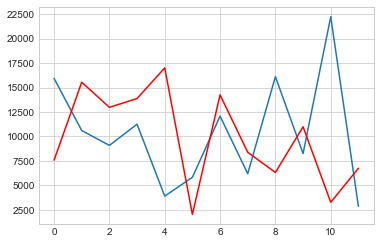

In [611]:
# plot forecasts against actual outcomes 
plt.style.use('seaborn-whitegrid')
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

#### `Analisando Resíduos`

      Erro Residual = Valor esperado − Valor Predito

- Erros residuais são erros em previsões de séries temporais.
- Uma análise dos erros pode sugerir melhoras no modelo.
  - Tendências.
  - Sazonalidades.

In [612]:
# erros residuais 
residuals = [test[i] - predictions[i] for i in range(len(test))]

# converte a lista em um dataframe
residuals = pd.DataFrame(residuals)

# imprime as 5 primeiras linhas
residuals.head()

,0
0,8368.342333
1,-4938.197450
2,-3893.075189
3,-2626.737134
4,-13111.266106


In [613]:
# estatística descritiva
residuals.describe()

,0
count,12.000000
mean,448.204797
std,8467.757536
min,-13111.266106
25%,-3894.428389
50%,-2407.529126
75%,4939.489447
max,18976.607877


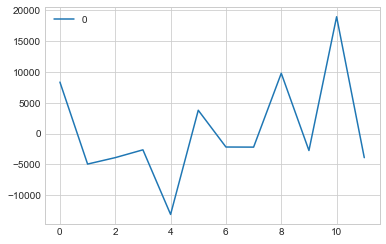

In [614]:
# plot residuals
residuals.plot()
pyplot.show()

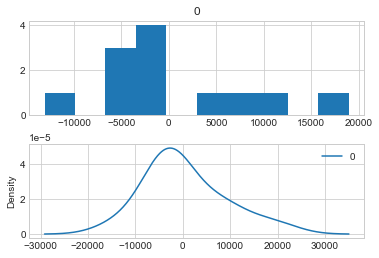

In [615]:
# plots histograma
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())

pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

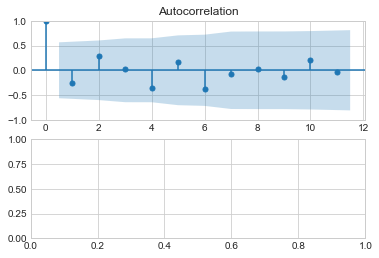

In [618]:
# plots de autocorrelação
pyplot.figure() 
pyplot.subplot(211)
plot_acf(residuals, ax=pyplot.gca())
pyplot.subplot(212)
#plot_pacf(residuals, ax=pyplot.gca())
pyplot.show()